In [4]:
!pip install easygui

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.7/92.7 kB 3.5 MB/s eta 0:00:00


In [5]:
import cv2 #for image processing
import easygui #to open the filebox
import numpy as np #to store image
import imageio #to read image stored at particular path
import sys
import matplotlib.pyplot as plt
import os
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image

In [6]:
""" fileopenbox opens the box to choose file
and help us store file path as string """
def upload():
    ImagePath=easygui.fileopenbox()
    cartoonify(ImagePath)

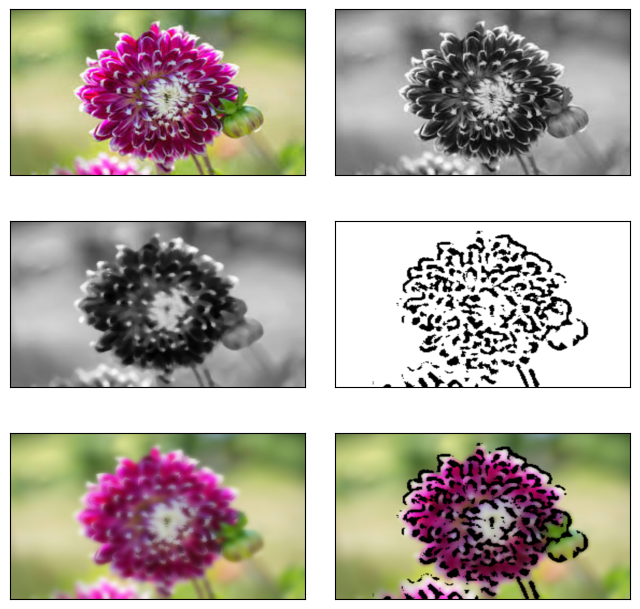

In [25]:
originalmage = cv2.imread('/content/images.jfif')
originalmage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2RGB)
if originalmage is None:
  print("Can not find any image. Choose appropriate file")
  sys.exit()
else:
  ReSized1 = cv2.resize(originalmage, (960, 540))
  grayScaleImage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2GRAY)
  ReSized2 = cv2.resize(grayScaleImage, (960, 540))
  smoothGrayScale = cv2.medianBlur(grayScaleImage, 5)
  ReSized3 = cv2.resize(smoothGrayScale, (960, 540))
  getEdge = cv2.adaptiveThreshold(smoothGrayScale, 255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY, 9, 9)
  ReSized4 = cv2.resize(getEdge, (960, 540))
  colorImage = cv2.bilateralFilter(originalmage, 9, 300, 300)
  ReSized5 = cv2.resize(colorImage, (960, 540))
  cartoonImage = cv2.bitwise_and(colorImage, colorImage, mask=getEdge)
  ReSized6 = cv2.resize(cartoonImage, (960, 540))
  images=[ReSized1, ReSized2, ReSized3, ReSized4, ReSized5, ReSized6]
  fig, axes = plt.subplots(3,2, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
  for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')
  plt.show()